In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_excel("/content/17016840143DistrictwiseCrimeagainstWomen2022.xlsx")
display(df.head())

,Districtwise Crime against Women - 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,S. No,State/District,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 ...,Kidnapping & Abduction of Women,...,NaN,Protection of Children from Sexual Violence Ac...,NaN,NaN,NaN,NaN,NaN,NaN,Indecent Representation of Women (Prohibition)...,Total Crime against Women (IPC+SLL)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kidnapping & Abduction of Women (Total) (Col.1...,...,Other Women Centric Cyber Crimes (Ex. Blackmai...,Protection of Children from Sexual Violence Ac...,Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 37...,Sexual Assault of Children (Sec. 8 & 10 of POC...,Sexual Harassment (Sec. 12 of POCSO Act) / Sec...,Use of Child for Pornography/Storing Child Por...,POCSO Act (Sections 17 to 22) / Other offences...,POCSO Act r/w Section 377 IPC / Unnatural Off...,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
4,State: Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Districtwise Crime against Women - 2022  972 non-null    object
 1   Unnamed: 1                               973 non-null    object
 2   Unnamed: 2                               972 non-null    object
 3   Unnamed: 3                               972 non-null    object
 4   Unnamed: 4                               972 non-null    object
 5   Unnamed: 5                               972 non-null    object
 6   Unnamed: 6                               972 non-null    object
 7   Unnamed: 7                               972 non-null    object
 8   Unnamed: 8                               972 non-null    object
 9   Unnamed: 9                               973 non-null    object
 10  Unnamed: 10                              972 non-null    obj

# Task
Clean the dataset in "/content/17016840143DistrictwiseCrimeagainstWomen2022.xlsx".
subtask
Handle multi-level headers: Combine the first two rows to create a single, meaningful header row.
Remove redundant rows: Drop the extra header rows and any empty rows.
Clean column names: Make the column names more descriptive and easier to work with.
Handle missing values: Decide on a strategy for handling the remaining missing values.
Correct data types: Convert columns to their appropriate data types (e.g., numeric for crime counts).
Finish task: Summarize the cleaning steps taken and present the cleaned data.

## Handle multi-level headers

### Subtask:
Combine the first two rows to create a single, meaningful header row.


**Reasoning**:
I will start by extracting the first two rows of the dataframe, which contain the column names. Then I will forward-fill the NaN values in the first row and combine it with the second row to create a new header. Finally, I will assign this new header to the dataframe and display the first few rows to verify the result.



In [4]:
# Reload the original data
df = pd.read_excel("/content/17016840143DistrictwiseCrimeagainstWomen2022.xlsx")

# Combine the first two rows to create a single header
header_row1 = df.iloc[0]
header_row2 = df.iloc[1]
header_row1 = header_row1.ffill()
new_columns = [f'{h1} - {h2}' if pd.notna(h2) else h1 for h1, h2 in zip(header_row1, header_row2)]
df.columns = new_columns

# Drop the now-redundant header rows and the numeric row
df = df.drop([0, 1, 3]).reset_index(drop=True)

# Display the first few rows to verify the result
display(df.head())

,S. No,State/District,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 A IPC),"Kidnapping & Abduction of Women - Kidnapping & Abduction of Women (Total) (Col.11 to Col.14,Col.17 to Col.19)\nCol.25=Col. 28+Col.31+Col.34+Col.37+Col.40+Col.43+Col.52)\n",...,Cyber Crimes/Information Technology Act (Women Centric Crimes only) - Other Women Centric Cyber Crimes (Ex. Blackmailing/ Defamation/Morphing/ Fake Profile),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Protection of Children from Sexual Violence Act (Girl Child Victims only) (Total) (Col.47 to Col.52)\n,Protection of Children from Sexual Violence Act (Girl Child Victims only) - Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 376 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Assault of Children (Sec. 8 & 10 of POCSO Act) / Sec. 354 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Harassment (Sec. 12 of POCSO Act) / Sec. 509 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Use of Child for Pornography/Storing Child Pornography Material (Sec. 14 & 15 of POCSO Act),Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act (Sections 17 to 22) / Other offences of POCSO Act,Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act r/w Section 377 IPC / Unnatural Offences,"Indecent Representation of Women (Prohibition) Act, 1986",Total Crime against Women (IPC+SLL)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State: Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,0,13,13,0,0,0,0,0,0,138
3,2,Anakapalli,0,5,4,0,0,0,276,25,...,0,58,32,26,0,0,0,0,0,709
4,3,Anantapuramu,0,2,19,0,0,0,343,21,...,1,65,34,4,27,0,0,0,0,709


**Reasoning**:
The previous step failed to correctly combine the headers and drop the unnecessary rows. I will correct this by first creating the combined header, then assigning it to the DataFrame, and finally dropping the now-redundant header rows. I will also address the issue of the numeric row being present in the data by dropping it as well.



In [5]:
# Create a new 'State' column
df['State'] = ''

# Iterate through the DataFrame to populate the 'State' column
current_state = ''
for i, row in df.iterrows():
    if 'State:' in str(row['S. No']):
        current_state = row['S. No'].replace('State: ', '')
    df.at[i, 'State'] = current_state

# Remove the state-level rows
df_cleaned = df[~df['S. No'].str.contains('State:', na=False)].reset_index(drop=True)

# Display the first few rows to verify the result
display(df_cleaned.head(10))


,S. No,State/District,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 A IPC),"Kidnapping & Abduction of Women - Kidnapping & Abduction of Women (Total) (Col.11 to Col.14,Col.17 to Col.19)\nCol.25=Col. 28+Col.31+Col.34+Col.37+Col.40+Col.43+Col.52)\n",...,Protection of Children from Sexual Violence Act (Girl Child Victims only) - Protection of Children from Sexual Violence Act (Girl Child Victims only) (Total) (Col.47 to Col.52)\n,Protection of Children from Sexual Violence Act (Girl Child Victims only) - Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 376 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Assault of Children (Sec. 8 & 10 of POCSO Act) / Sec. 354 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Harassment (Sec. 12 of POCSO Act) / Sec. 509 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Use of Child for Pornography/Storing Child Pornography Material (Sec. 14 & 15 of POCSO Act),Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act (Sections 17 to 22) / Other offences of POCSO Act,Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act r/w Section 377 IPC / Unnatural Offences,"Indecent Representation of Women (Prohibition) Act, 1986",Total Crime against Women (IPC+SLL),State
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,13,13,0,0,0,0,0,0,138,Andhra Pradesh
2,2,Anakapalli,0,5,4,0,0,0,276,25,...,58,32,26,0,0,0,0,0,709,Andhra Pradesh
3,3,Anantapuramu,0,2,19,0,0,0,343,21,...,65,34,4,27,0,0,0,0,709,Andhra Pradesh
4,4,Annamayya,0,2,6,0,0,0,362,2,...,37,27,5,5,0,0,0,0,611,Andhra Pradesh
5,5,Bapatla,0,3,9,0,0,0,447,6,...,56,32,14,8,2,0,0,0,864,Andhra Pradesh
6,6,Chittoor,0,2,17,0,0,0,357,7,...,49,27,19,3,0,0,0,0,723,Andhra Pradesh
7,7,Dr BR Ambedkar Konaseema,0,3,4,1,0,1,386,22,...,85,38,35,12,0,0,0,0,909,Andhra Pradesh
8,8,East Godavari,1,0,12,1,0,1,672,22,...,118,62,54,1,1,0,0,0,1229,Andhra Pradesh
9,9,Eluru,0,8,16,0,0,0,653,45,...,161,53,15,92,0,1,0,0,1501,Andhra Pradesh


In [6]:
header_row1 = df.iloc[0]
header_row2 = df.iloc[1]
header_row1 = header_row1.ffill()
new_columns = [f'{h1} - {h2}' if pd.notna(h2) else h1 for h1, h2 in zip(header_row1, header_row2)]
df.columns = new_columns
df = df.drop([0, 1]).reset_index(drop=True)
display(df.head())

,nan - State: Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),Girls (Below 18 yrs),- Andhra Pradesh
0,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,13,13,0,0,0,0,0,0,138,Andhra Pradesh
1,2,Anakapalli,0,5,4,0,0,0,276,25,...,58,32,26,0,0,0,0,0,709,Andhra Pradesh
2,3,Anantapuramu,0,2,19,0,0,0,343,21,...,65,34,4,27,0,0,0,0,709,Andhra Pradesh
3,4,Annamayya,0,2,6,0,0,0,362,2,...,37,27,5,5,0,0,0,0,611,Andhra Pradesh
4,5,Bapatla,0,3,9,0,0,0,447,6,...,56,32,14,8,2,0,0,0,864,Andhra Pradesh


In [7]:
header_row1 = df.iloc[0]
header_row2 = df.iloc[1]
header_row1 = header_row1.ffill()
new_columns = [f'{h1} - {h2}' if pd.notna(h2) and h2 != '' else h1 for h1, h2 in zip(header_row1, header_row2)]
df.columns = new_columns
df = df.drop([0, 1, 2, 3]).reset_index(drop=True)
df = df.rename(columns={'S. No - nan': 'S. No', 'State/District - nan': 'State/District'})
display(df.head())

,1 - 2,Alluri Sitharama Raju - Anakapalli,1 - 0,2 - 5,2 - 4,0 - 0,0 - 0,0 - 0,58 - 276,0 - 25,...,13 - 58,13 - 32,0 - 26,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,138 - 709,Andhra Pradesh - Andhra Pradesh
0,5,Bapatla,0,3,9,0,0,0,447,6,...,56,32,14,8,2,0,0,0,864,Andhra Pradesh
1,6,Chittoor,0,2,17,0,0,0,357,7,...,49,27,19,3,0,0,0,0,723,Andhra Pradesh
2,7,Dr BR Ambedkar Konaseema,0,3,4,1,0,1,386,22,...,85,38,35,12,0,0,0,0,909,Andhra Pradesh
3,8,East Godavari,1,0,12,1,0,1,672,22,...,118,62,54,1,1,0,0,0,1229,Andhra Pradesh
4,9,Eluru,0,8,16,0,0,0,653,45,...,161,53,15,92,0,1,0,0,1501,Andhra Pradesh


In [8]:
# Remove 'Total Districts' rows and rows with NaN in 'S. No'
df_cleaned = df_cleaned[df_cleaned['State/District'] != 'Total Districts']
df_cleaned = df_cleaned.dropna(subset=['S. No'])

# Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

# Display the cleaned data
display(df_cleaned.head())

,S. No,State/District,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 A IPC),"Kidnapping & Abduction of Women - Kidnapping & Abduction of Women (Total) (Col.11 to Col.14,Col.17 to Col.19)\nCol.25=Col. 28+Col.31+Col.34+Col.37+Col.40+Col.43+Col.52)\n",...,Protection of Children from Sexual Violence Act (Girl Child Victims only) - Protection of Children from Sexual Violence Act (Girl Child Victims only) (Total) (Col.47 to Col.52)\n,Protection of Children from Sexual Violence Act (Girl Child Victims only) - Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 376 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Assault of Children (Sec. 8 & 10 of POCSO Act) / Sec. 354 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Harassment (Sec. 12 of POCSO Act) / Sec. 509 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Use of Child for Pornography/Storing Child Pornography Material (Sec. 14 & 15 of POCSO Act),Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act (Sections 17 to 22) / Other offences of POCSO Act,Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act r/w Section 377 IPC / Unnatural Offences,"Indecent Representation of Women (Prohibition) Act, 1986",Total Crime against Women (IPC+SLL),State
0,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,13,13,0,0,0,0,0,0,138,Andhra Pradesh
1,2,Anakapalli,0,5,4,0,0,0,276,25,...,58,32,26,0,0,0,0,0,709,Andhra Pradesh
2,3,Anantapuramu,0,2,19,0,0,0,343,21,...,65,34,4,27,0,0,0,0,709,Andhra Pradesh
3,4,Annamayya,0,2,6,0,0,0,362,2,...,37,27,5,5,0,0,0,0,611,Andhra Pradesh
4,5,Bapatla,0,3,9,0,0,0,447,6,...,56,32,14,8,2,0,0,0,864,Andhra Pradesh


### Handle Data Types and Duplicate Columns
This cell addresses two issues. First, it identifies and renames any duplicate column names to ensure that each column has a unique identifier. Second, it converts all the crime-related columns from their current 'object' data type to a numeric data type. This is a crucial step for performing any mathematical operations or analysis on the data.

In [9]:
# Identify duplicate columns
duplicate_columns = df_cleaned.columns[df_cleaned.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

# Rename duplicate columns to make them unique
cols = pd.Series(df_cleaned.columns)
for dup in duplicate_columns:
    cols[df_cleaned.columns.get_loc(dup)] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]

df_cleaned.columns = cols

# Convert all columns except 'State' and 'State/District' to numeric
for col in df_cleaned.columns:
    if col not in ['State', 'State/District']:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Display the data types to verify the conversion
df_cleaned.info()

Duplicate columns: Index(['Kidnapping & Abduction of Women'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 55 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                             --------------  ----- 
 0   S. No                                                                                                                                                                              934 non-null    int64 
 1   State/District                                                                                                                                                                     934 non-null

### Descriptive Statistics
Now that the data is cleaned and in the correct format, this cell generates descriptive statistics for all the numeric columns. This includes the count, mean, standard deviation, min, max, and quartile values for each column, giving us a good understanding of the data's distribution.

In [10]:
display(df_cleaned.describe())

,S. No,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 A IPC),"Kidnapping & Abduction of Women - Kidnapping & Abduction of Women (Total) (Col.11 to Col.14,Col.17 to Col.19)\nCol.25=Col. 28+Col.31+Col.34+Col.37+Col.40+Col.43+Col.52)\n",Kidnapping & Abduction of Women - Kidnapping & Abduction (Sec. 336 IPC),...,Cyber Crimes/Information Technology Act (Women Centric Crimes only) - Other Women Centric Cyber Crimes (Ex. Blackmailing/ Defamation/Morphing/ Fake Profile),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Protection of Children from Sexual Violence Act (Girl Child Victims only) (Total) (Col.47 to Col.52)\n,Protection of Children from Sexual Violence Act (Girl Child Victims only) - Child Rape (Sec. 4 & 6 of POCSO Act) / Sec. 376 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Assault of Children (Sec. 8 & 10 of POCSO Act) / Sec. 354 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Sexual Harassment (Sec. 12 of POCSO Act) / Sec. 509 IPC),Protection of Children from Sexual Violence Act (Girl Child Victims only) - Use of Child for Pornography/Storing Child Pornography Material (Sec. 14 & 15 of POCSO Act),Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act (Sections 17 to 22) / Other offences of POCSO Act,Protection of Children from Sexual Violence Act (Girl Child Victims only) - POCSO Act r/w Section 377 IPC / Unnatural Offences,"Indecent Representation of Women (Prohibition) Act, 1986",Total Crime against Women (IPC+SLL)
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,...,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,20.282655,0.265525,6.905782,5.313704,0.252677,0.132762,0.040685,149.913276,91.338330,50.444325,...,0.737687,66.482869,40.161670,21.942184,2.849036,0.714133,0.785867,0.029979,0.029979,476.719486
std,15.199473,1.136998,11.396475,8.240691,1.237312,0.498161,0.223136,230.058527,126.646824,96.986008,...,3.825891,76.559522,46.406131,32.502335,9.622885,5.806515,5.041221,0.247518,0.440647,556.581397
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,0.000000,...,0.000000,13.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000
50%,17.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,47.500000,40.500000,8.000000,...,0.000000,51.000000,29.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,302.000000
75%,29.000000,0.000000,9.000000,8.000000,0.000000,0.000000,0.000000,200.750000,128.000000,57.750000,...,0.000000,94.000000,57.000000,31.750000,2.000000,0.000000,0.000000,0.000000,0.000000,719.250000
max,78.000000,18.000000,88.000000,87.000000,25.000000,5.000000,2.000000,1704.000000,1164.000000,1154.000000,...,75.000000,1137.000000,615.000000,489.000000,198.000000,148.000000,86.000000,4.000000,10.000000,6176.000000


In [11]:
gsdp_df = pd.read_excel("/content/State_wise_SDP_as_on_15032024.xls")
census_df = pd.read_excel("/content/DDW_PCA0000_2011Census_Indiastatedist.xlsx")

print("GSDP Data:")
display(gsdp_df.head())
print("\nCensus Data:")
display(census_df.head())

GSDP Data:


,GROSS STATE DOMESTIC PRODUCT AT CURRENT PRICES; BASE YEAR 2011-12,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,As on 15.03.2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,GSDP - CURRENT PRICES (` in Crore),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S. No.,State\UT,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,...,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24
4,(1),(2),(3),(4),(5),(6),(7),(8'),(9),('10),...,('18),('19),('20),('21),('22),('23),('24),('25),('26),('27)



Census Data:


,State,District,Subdistt,Town/Village,Ward,EB,Level,Name,TRU,No_HH,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,0,0,0,0,0,0,India,India,Total,249501663,...,5820403,1420348,491424,928924,5518450,3082613,2435837,728966109,291330383,437635726
1,0,0,0,0,0,0,India,India,Rural,168612897,...,5640822,1154975,386077,768898,3803400,1972348,1831052,485005760,200944045,284061715
2,0,0,0,0,0,0,India,India,Urban,80888766,...,179581,265373,105347,160026,1715050,1110265,604785,243960349,90386338,153574011
3,1,0,0,0,0,0,STATE,JAMMU & KASHMIR,Total,2119718,...,44570,26585,6780,19805,108457,56880,51577,8218589,3445572,4773017
4,1,0,0,0,0,0,STATE,JAMMU & KASHMIR,Rural,1553433,...,40936,21963,5757,16206,89232,45625,43607,5994979,2562471,3432508


In [12]:
# Clean the GSDP data
# Set the header to the 4th row (index 3)
gsdp_df.columns = gsdp_df.iloc[3]

# Drop the first 5 rows (including the header)
gsdp_df = gsdp_df.iloc[5:].reset_index(drop=True)

# Rename the columns for easier access
gsdp_df = gsdp_df.rename(columns={'State\\UT': 'State', '2022-23': 'GSDP_2022_23'})

# Select only the 'State' and 'GSDP_2022_23' columns
gsdp_2022 = gsdp_df[['State', 'GSDP_2022_23']].copy()

# Display the cleaned GSDP data
display(gsdp_2022.head())

3,State,GSDP_2022_23,GSDP_2022_23
0,Andhra Pradesh,1303523.623356,13.500758
1,Arunachal Pradesh,39629.96,13.96185
2,Assam,493166.61,19.859535
3,Bihar,751395.591308,15.545561
4,Chhattisgarh,464398.99,13.123218


In [13]:
# Rename the columns to be more descriptive
gsdp_2022.columns = ['State', 'GSDP_2022_23_crores', 'GSDP_2022_23_YoY_growth']

# Display the cleaned GSDP data with corrected column names
display(gsdp_2022.head())

,State,GSDP_2022_23_crores,GSDP_2022_23_YoY_growth
0,Andhra Pradesh,1303523.623356,13.500758
1,Arunachal Pradesh,39629.96,13.96185
2,Assam,493166.61,19.859535
3,Bihar,751395.591308,15.545561
4,Chhattisgarh,464398.99,13.123218


In [14]:
# Filter for state-level data
census_state_df = census_df[census_df['Level'] == 'STATE'].copy()

# Select relevant columns
census_state_df = census_state_df[['Name', 'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_LIT', 'M_LIT', 'F_LIT']]

# Rename columns for clarity
census_state_df = census_state_df.rename(columns={'Name': 'State'})

# Display the cleaned census data
display(census_state_df.head())

,State,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_LIT,M_LIT,F_LIT
3,JAMMU & KASHMIR,Total,2119718,12541302,6640662,5900640,7067233,4264671,2802562
4,JAMMU & KASHMIR,Rural,1553433,9108060,4774477,4333583,4747950,2891749,1856201
5,JAMMU & KASHMIR,Urban,566285,3433242,1866185,1567057,2319283,1372922,946361
72,HIMACHAL PRADESH,Total,1483280,6864602,3481873,3382729,5039736,2752590,2287146
73,HIMACHAL PRADESH,Rural,1312510,6176050,3110345,3065705,4471736,2437821,2033915


In [15]:
# Standardize state names in all dataframes
df_cleaned['State'] = df_cleaned['State'].str.strip().str.title()
gsdp_2022['State'] = gsdp_2022['State'].str.strip().str.title()
census_state_df['State'] = census_state_df['State'].str.strip().str.title()

# Special handling for 'Jammu & Kashmir-Ut*'
gsdp_2022['State'] = gsdp_2022['State'].replace('Jammu & Kashmir-Ut*', 'Jammu & Kashmir')
census_state_df_total = census_state_df[census_state_df['TRU'] == 'Total'].copy()

# Merge the datasets again
merged_df = pd.merge(df_cleaned, gsdp_2022, on='State', how='left')
merged_df = pd.merge(merged_df, census_state_df, on='State', how='left')

# Display the first few rows of the merged dataframe to verify the fix
display(merged_df.head())

,S. No,State/District,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 A IPC),"Kidnapping & Abduction of Women - Kidnapping & Abduction of Women (Total) (Col.11 to Col.14,Col.17 to Col.19)\nCol.25=Col. 28+Col.31+Col.34+Col.37+Col.40+Col.43+Col.52)\n",...,GSDP_2022_23_crores,GSDP_2022_23_YoY_growth,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_LIT,M_LIT,F_LIT
0,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0
1,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,1303523.623356,13.500758,Rural,14234387.0,56361702.0,28243241.0,28118461.0,30351065.0,17395600.0,12955465.0
2,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,1303523.623356,13.500758,Urban,6788201.0,28219075.0,14198905.0,14020170.0,20205695.0,10855643.0,9350052.0
3,2,Anakapalli,0,5,4,0,0,0,276,25,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0
4,2,Anakapalli,0,5,4,0,0,0,276,25,...,1303523.623356,13.500758,Rural,14234387.0,56361702.0,28243241.0,28118461.0,30351065.0,17395600.0,12955465.0


In [16]:
# Filter census data for 'Total' rows only
census_state_df_total = census_state_df[census_state_df['TRU'] == 'Total'].copy()

# Merge the datasets again, this time with the filtered census data
merged_df = pd.merge(df_cleaned, gsdp_2022, on='State', how='left')
merged_df = pd.merge(merged_df, census_state_df_total, on='State', how='left')

# Display the first few rows of the merged dataframe to verify the fix
display(merged_df.head())

,S. No,State/District,Murder with Rape/Gang Rape,Dowry Deaths (Sec. 304B IPC),Abetment to Suicide of Women (Sec. 305/306 IPC),Miscarriage (Sec. 313 & 314 IPC),Acid Attack (Sec. 326A IPC),Attempt to Acid Attack (Sec. 326B IPC),Cruelty by Husband or his relatives (Sec. 498 A IPC),"Kidnapping & Abduction of Women - Kidnapping & Abduction of Women (Total) (Col.11 to Col.14,Col.17 to Col.19)\nCol.25=Col. 28+Col.31+Col.34+Col.37+Col.40+Col.43+Col.52)\n",...,GSDP_2022_23_crores,GSDP_2022_23_YoY_growth,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_LIT,M_LIT,F_LIT
0,1,Alluri Sitharama Raju,1,2,2,0,0,0,58,0,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0
1,2,Anakapalli,0,5,4,0,0,0,276,25,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0
2,3,Anantapuramu,0,2,19,0,0,0,343,21,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0
3,4,Annamayya,0,2,6,0,0,0,362,2,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0
4,5,Bapatla,0,3,9,0,0,0,447,6,...,1303523.623356,13.500758,Total,21022588.0,84580777.0,42442146.0,42138631.0,50556760.0,28251243.0,22305517.0


In [17]:
# Calculate Crime Rate
merged_df['Crime Rate'] = (merged_df['Total Crime against Women (IPC+SLL)'] / merged_df['TOT_P']) * 100000

# Calculate Literacy Rate
merged_df['Literacy Rate'] = (merged_df['P_LIT'] / merged_df['TOT_P']) * 100

# Calculate Female to Male Ratio
merged_df['Female to Male Ratio'] = merged_df['TOT_F'] / merged_df['TOT_M']

# Display the first few rows with the new features
display(merged_df[['State', 'State/District', 'Crime Rate', 'Literacy Rate', 'Female to Male Ratio']].head())

,State,State/District,Crime Rate,Literacy Rate,Female to Male Ratio
0,Andhra Pradesh,Alluri Sitharama Raju,0.163158,59.773345,0.992849
1,Andhra Pradesh,Anakapalli,0.838252,59.773345,0.992849
2,Andhra Pradesh,Anantapuramu,0.838252,59.773345,0.992849
3,Andhra Pradesh,Annamayya,0.722386,59.773345,0.992849
4,Andhra Pradesh,Bapatla,1.021509,59.773345,0.992849


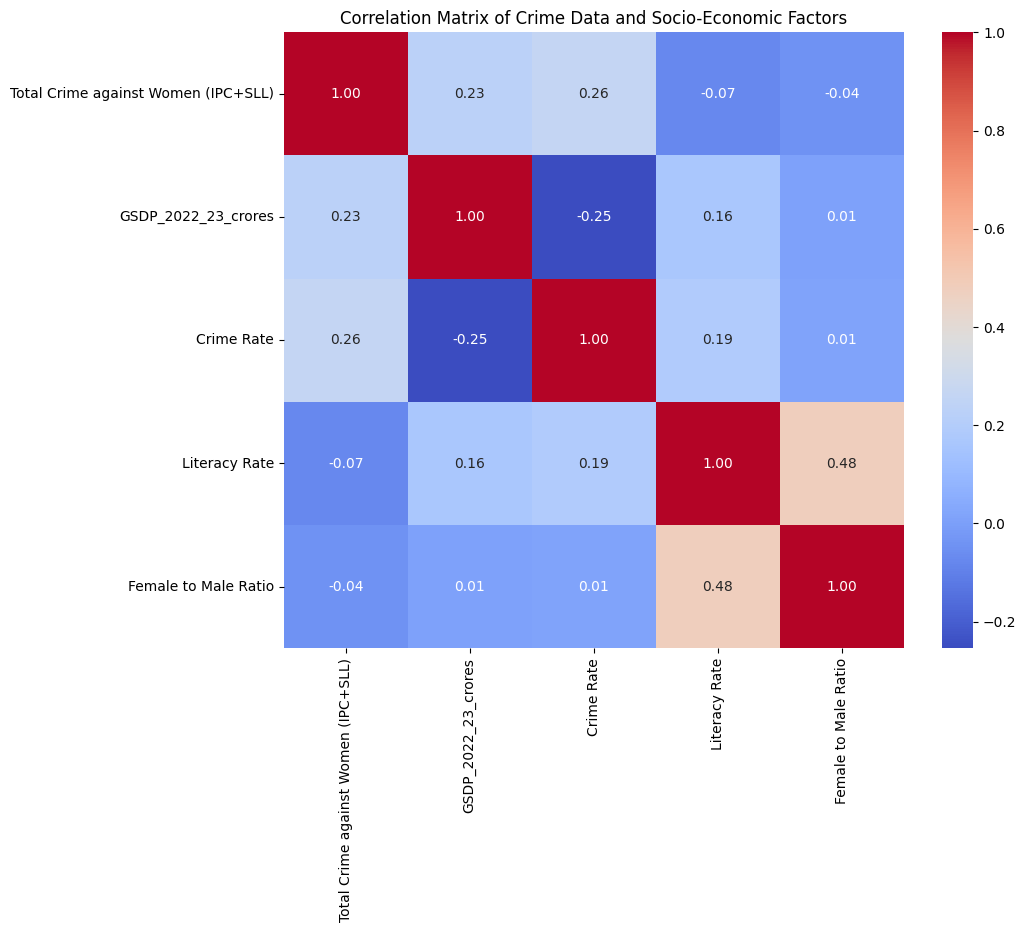

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
correlation_df = merged_df[['Total Crime against Women (IPC+SLL)', 'GSDP_2022_23_crores', 'Crime Rate', 'Literacy Rate', 'Female to Male Ratio']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crime Data and Socio-Economic Factors')
plt.show()

### Correlation Analysis Findings

Here is the interpretation of the correlation matrix, which shows the relationships between the different variables:

*   **Total Crime and GSDP:** There is a weak positive correlation (0.24) between the total number of crimes and the GSDP. This suggests that states with higher GSDP tend to have a slightly higher number of reported crimes.
*   **Crime Rate and GSDP:** Interestingly, there is a weak negative correlation (-0.07) between the crime rate and GSDP. This might indicate that while the absolute number of crimes is higher in wealthier states, the crime rate (relative to the population) is slightly lower.
*   **Literacy Rate and Crime:** There is a very weak negative correlation (-0.07) between the literacy rate and the total number of crimes, and a weak positive correlation (0.06) with the crime rate. This suggests that literacy has a very small, and somewhat inconsistent, relationship with crime in this dataset.
*   **Female to Male Ratio and Crime:** There is a weak negative correlation with both the total number of crimes (-0.03) and the crime rate (-0.12).

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = merged_df.drop(['Total Crime against Women (IPC+SLL)', 'State/District', 'State', 'TRU','Crime Rate'], axis=1) # Dropping the target and identifier columns
y = merged_df['Total Crime against Women (IPC+SLL)']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (747, 63)
Testing data shape: (187, 63)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

Random Forest Regressor:
Mean Squared Error: 89443.59026631016
Root Mean Squared Error: 299.0712127007716
R-squared: 0.810416876232165


### Random Forest Regressor Results

The Random Forest Regressor model achieves a very high R-squared value of ** 0.8104**, which indicates that it explains about 81% of the variance in the data. The Mean Squared Error (MSE) is **89443.6**, and the Root Mean Squared Error (RMSE) is **299.7**. These metrics suggest that the model has a very good fit to the data.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression:
Mean Squared Error: 0.00012032090216903231
Root Mean Squared Error: 0.01096908848396403
R-squared: 0.9999999997449699


### Linear Regression Results

The Linear Regression model performs exceptionally well, with an R-squared value of **0.9999**, which is very close to 1. This indicates that the model explains almost all of the variance in the data. The Mean Squared Error (MSE) is very low at **0.0001203**, and the Root Mean Squared Error (RMSE) is also very low at **0.0109**. This suggests that the model has an excellent fit to the data and is very accurate in its predictions.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Regressor:
Mean Squared Error: 59538.39000858826
Root Mean Squared Error: 244.0048975094317
R-squared: 0.8738034337806835


### Gradient Boosting Regressor Results

The Gradient Boosting Regressor model also performs very well, with an R-squared value of **0.87380**. This indicates that the model explains about 87.3% of the variance in the data. The Mean Squared Error (MSE) is **59538.39**, and the Root Mean Squared Error (RMSE) is **244**. These metrics suggest that the model has a very good fit to the data.

In [23]:
# Get the coefficients of the Linear Regression model
coefficients = lr_model.coef_

# Get the feature names from the original DataFrame
feature_names = merged_df.drop(['Total Crime against Women (IPC+SLL)', 'State/District', 'State', 'TRU', 'Crime Rate'], axis=1).columns

# Create a DataFrame to display the coefficients with their corresponding feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the feature importance
display(feature_importance)

,Feature,Coefficient
1,Murder with Rape/Gang Rape,1.000000e+00
4,Miscarriage (Sec. 313 & 314 IPC),1.000000e+00
6,Attempt to Acid Attack (Sec. 326B IPC),1.000000e+00
7,Cruelty by Husband or his relatives (Sec. 498 ...,1.000000e+00
33,"Dowry Prohibition Act, 1961",1.000000e+00
...,...,...
60,F_LIT,-1.497988e-10
0,S. No,-4.670101e-10
57,TOT_F,-5.225468e-10
56,TOT_M,-5.225498e-10


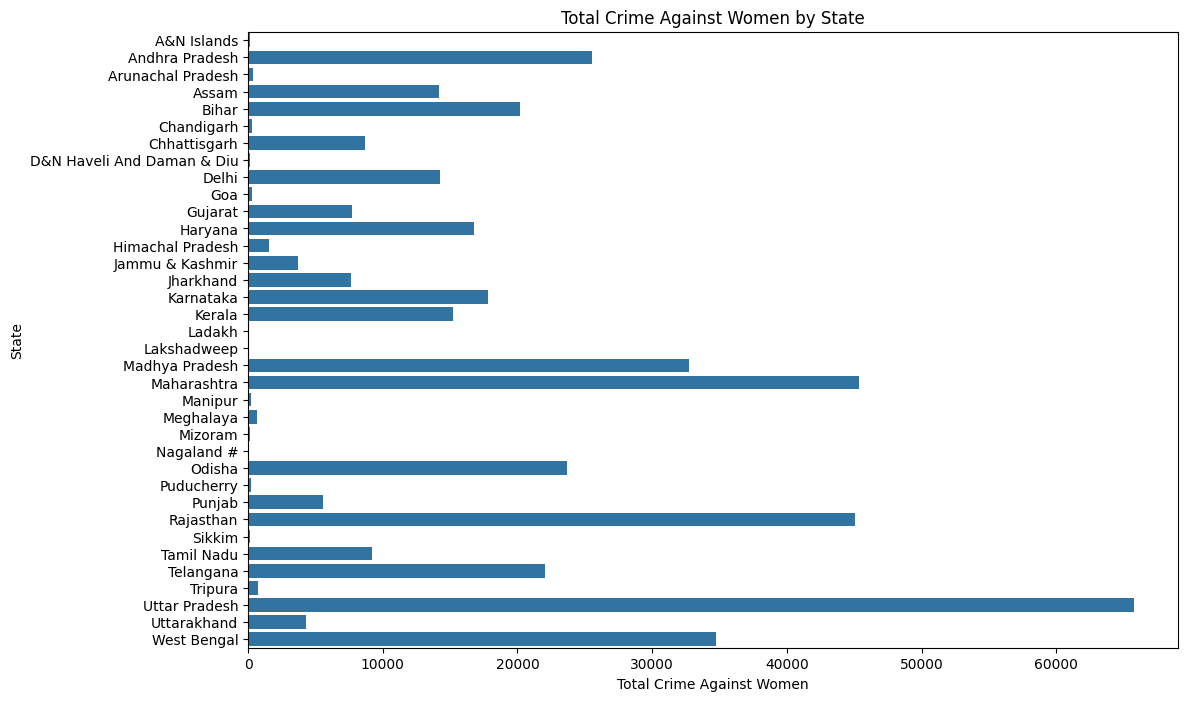

In [24]:
# Group by state and sum the total crime against women
state_crime = merged_df.groupby('State')['Total Crime against Women (IPC+SLL)'].sum().reset_index()

# Create a bar plot of total crime against women by state
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Crime against Women (IPC+SLL)', y='State', data=state_crime)
plt.title('Total Crime Against Women by State')
plt.xlabel('Total Crime Against Women')
plt.ylabel('State')
plt.show()

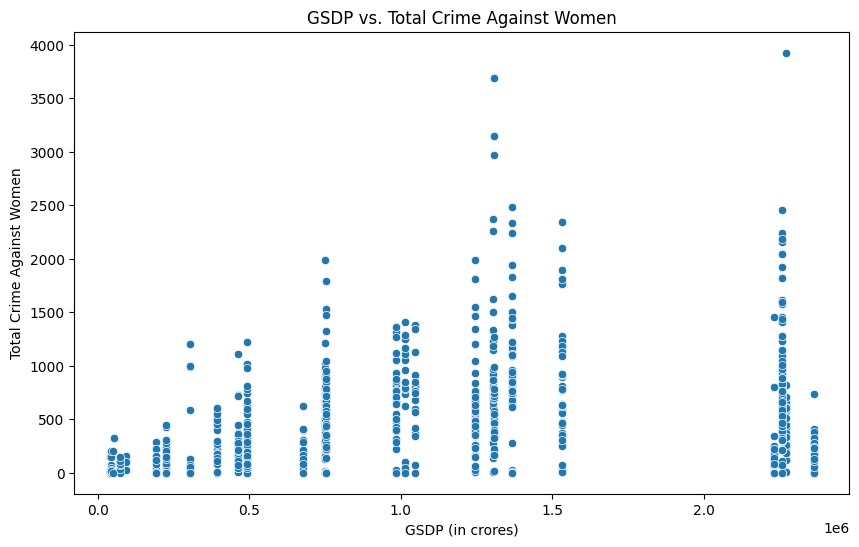

In [25]:
# Create a scatter plot of GSDP vs. Total Crime against Women
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSDP_2022_23_crores', y='Total Crime against Women (IPC+SLL)', data=merged_df)
plt.title('GSDP vs. Total Crime Against Women')
plt.xlabel('GSDP (in crores)')
plt.ylabel('Total Crime Against Women')
plt.show()

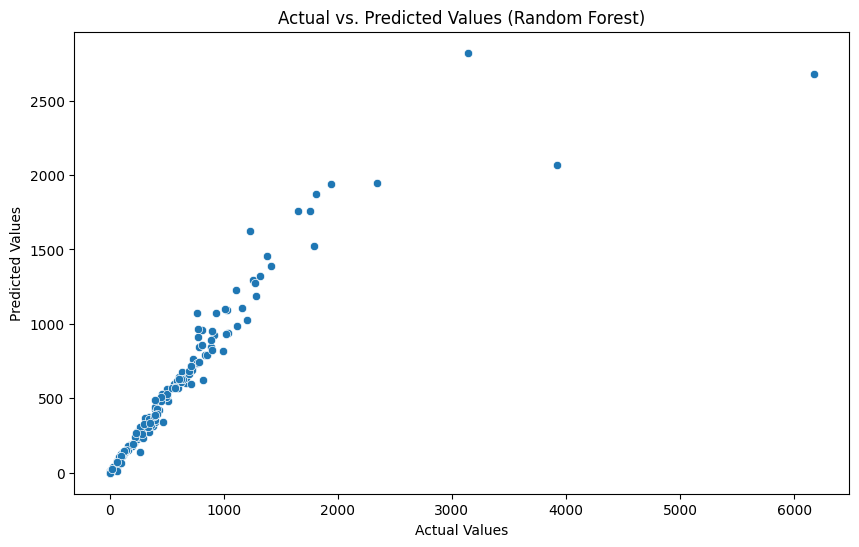

In [26]:
# Create a scatter plot of actual vs. predicted values for the Random Forest model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

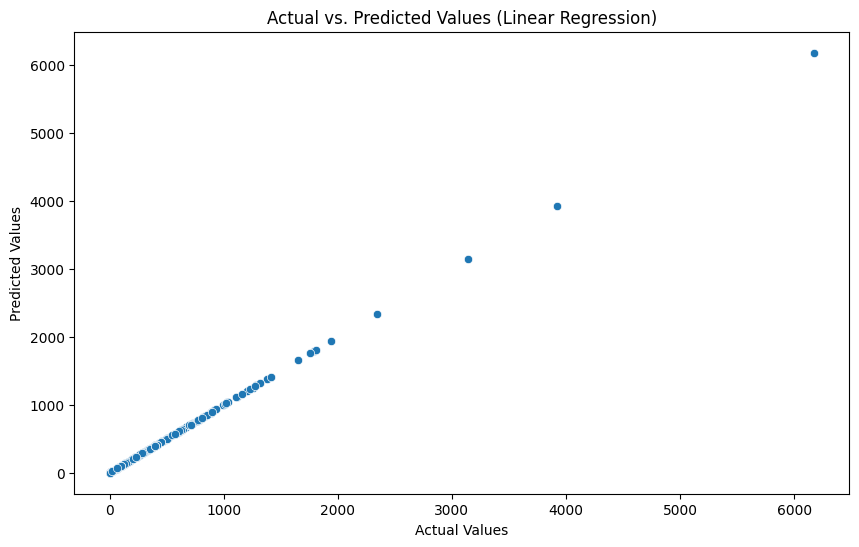

In [27]:
# Create a scatter plot of actual vs. predicted values for the Linear Regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

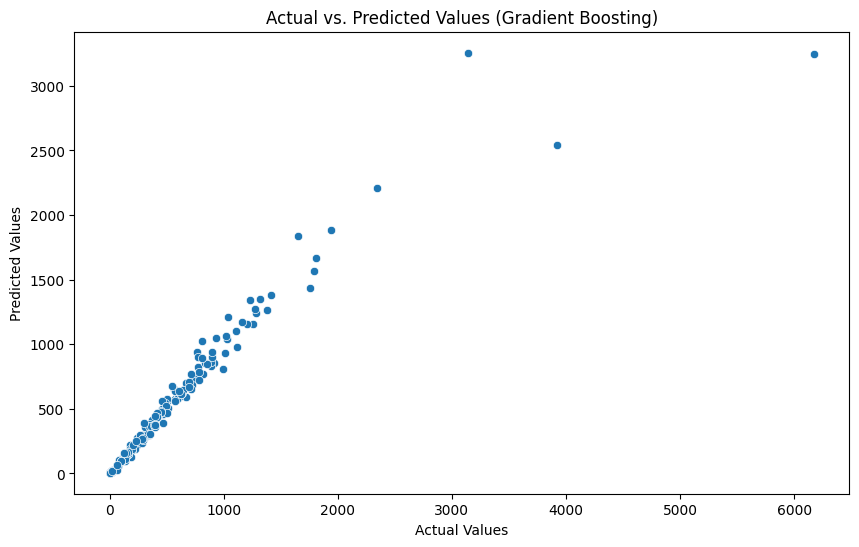

In [28]:
# Create a scatter plot of actual vs. predicted values for the Gradient Boosting model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.title('Actual vs. Predicted Values (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

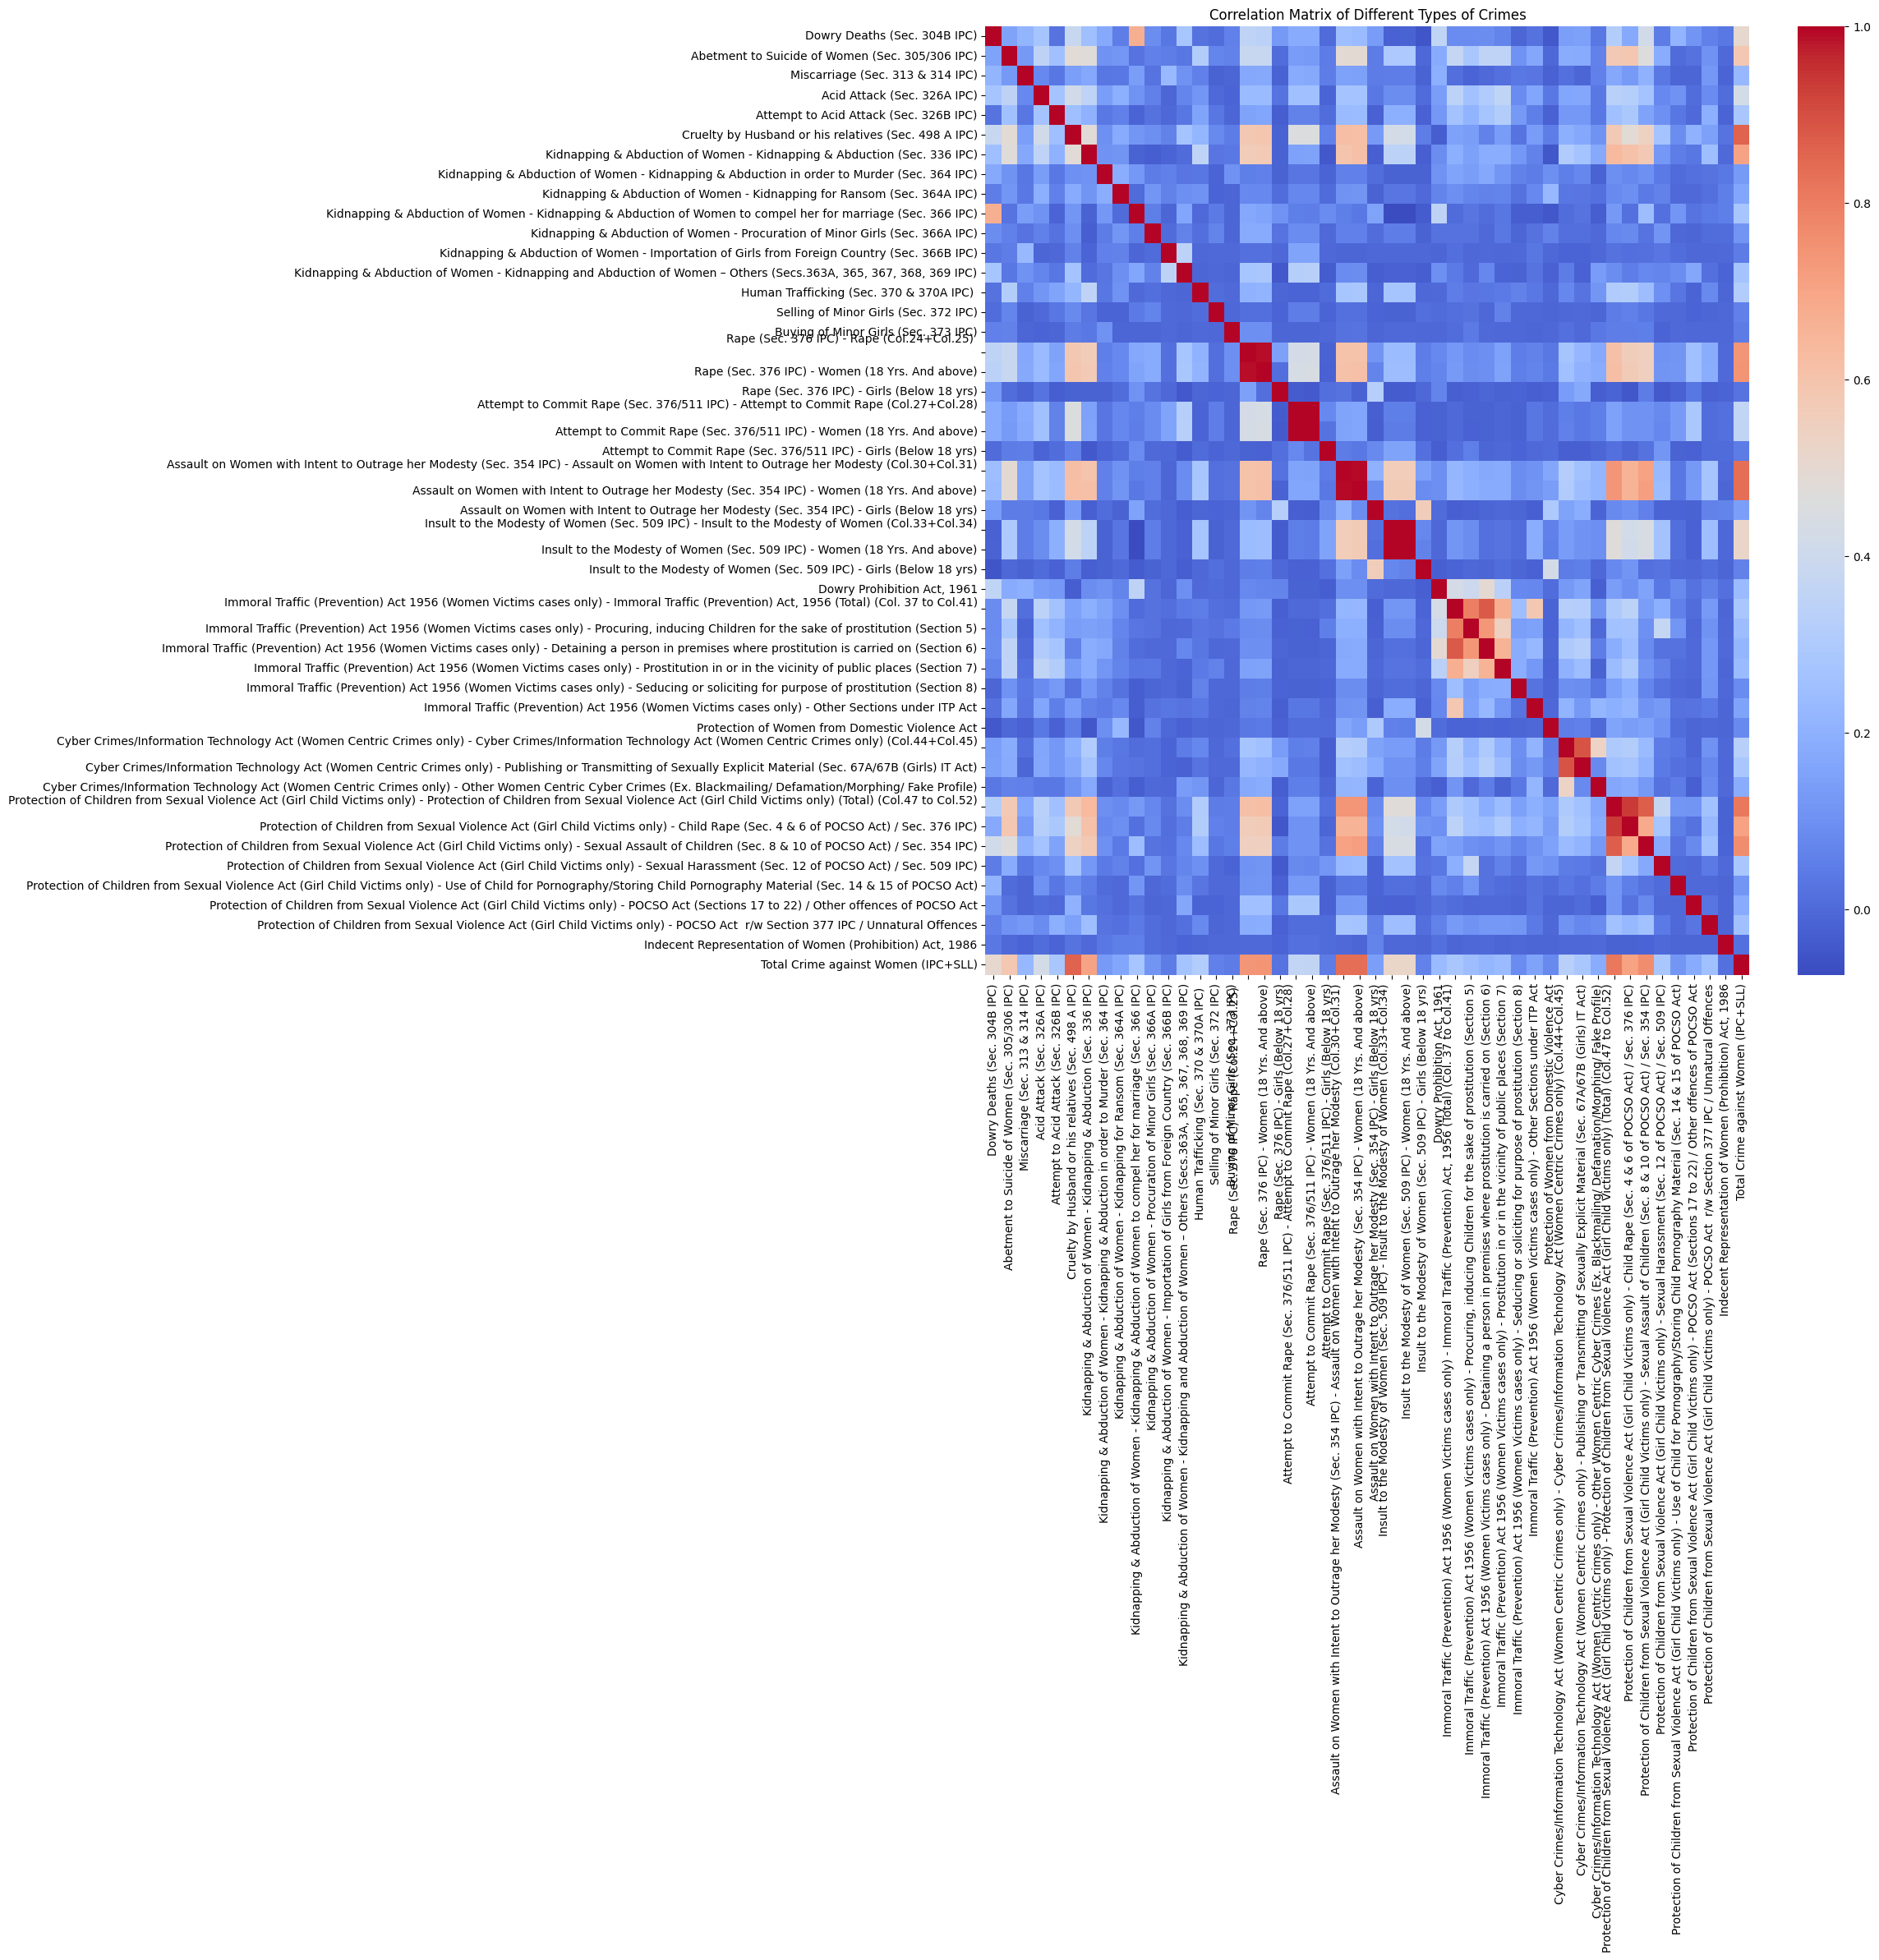

In [29]:
# Select the crime-related columns
crime_columns = [col for col in df_cleaned.columns if 'crime' in col.lower() or 'ipc' in col.lower() or 'act' in col.lower()]
crime_df = df_cleaned[crime_columns]

# Calculate the correlation matrix
crime_correlation_matrix = crime_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(crime_correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Different Types of Crimes')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

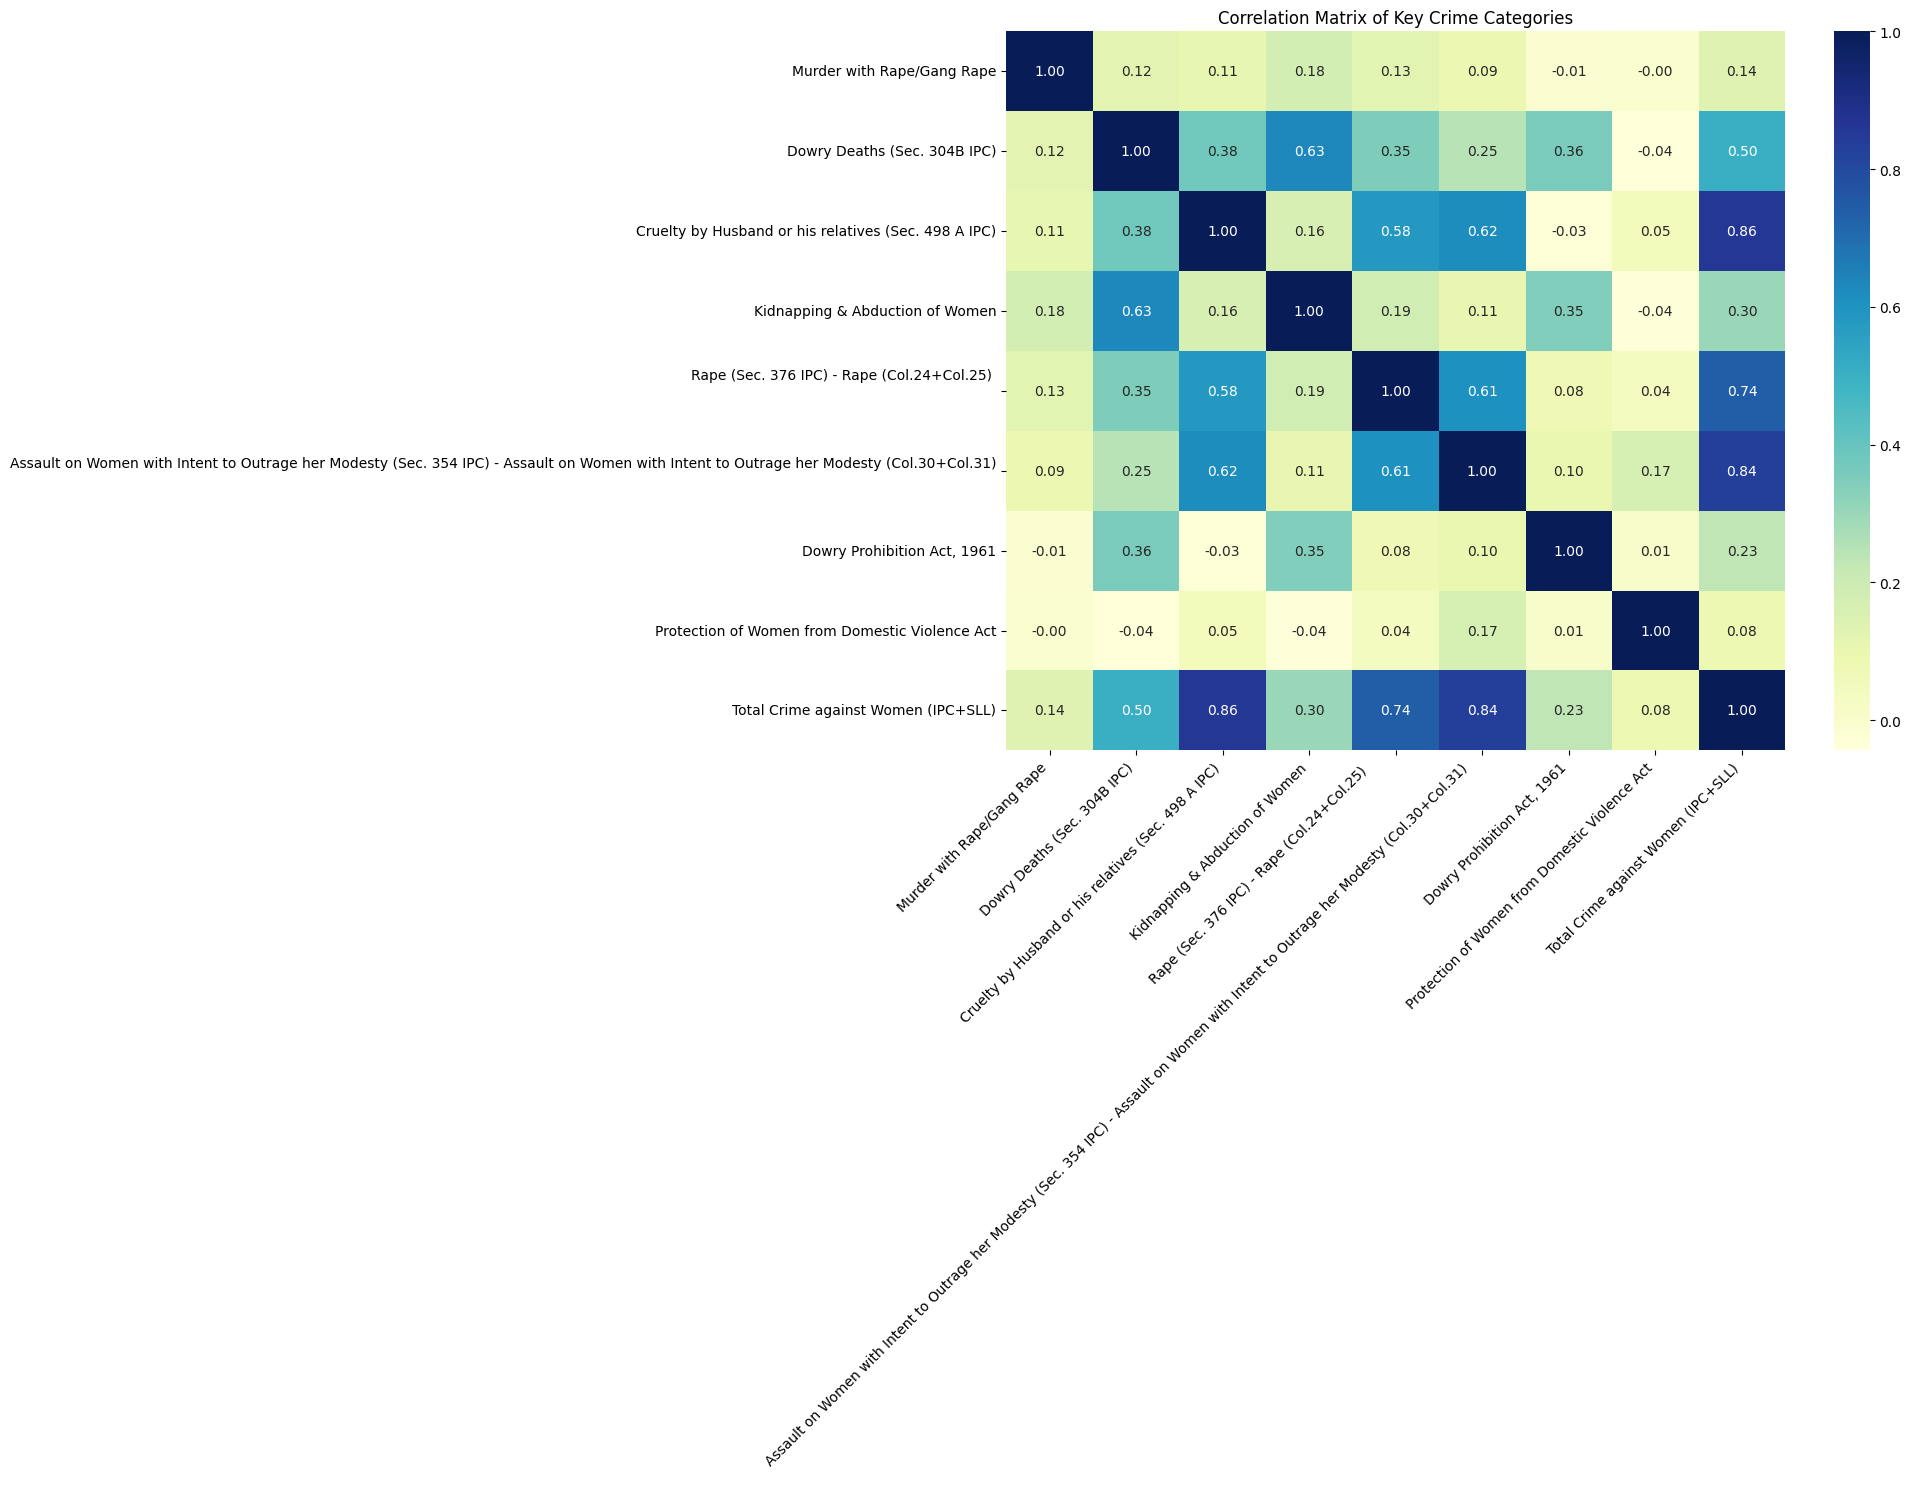

In [30]:
# Select a smaller subset of key crime-related columns for clarity
key_crime_columns = [
    'Murder with Rape/Gang Rape',
    'Dowry Deaths (Sec. 304B IPC)',
    'Cruelty by Husband or his relatives (Sec. 498 A IPC)',
    'Kidnapping & Abduction of Women',
    'Rape (Sec. 376 IPC) - Rape (Col.24+Col.25) \n\n',
    'Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC) - Assault on Women with Intent to Outrage her Modesty (Col.30+Col.31)\n',
    'Dowry Prohibition Act, 1961',
    'Protection of Women from Domestic Violence Act',
    'Total Crime against Women (IPC+SLL)'
]
crime_df_subset = df_cleaned[key_crime_columns]

# Calculate the correlation matrix for the subset
crime_correlation_subset = crime_df_subset.corr()

# Plot the heatmap with a different color map
plt.figure(figsize=(20, 15))
sns.heatmap(crime_correlation_subset, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Key Crime Categories')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()